In [1]:
## seasonalty and trend can only be predicted in time forecasting

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.offline as py
py.init_notebook_mode()
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
from pylab import rcParams
from pandas  import Series
from numpy import log

In [3]:
df = pd.read_csv('datasets_302666_618181_AAPL.csv')

In [4]:
df.head()

Date        Open        High         Low       Close   Adj Close  \
0  8/15/2018  209.220001  210.740005  208.330002  210.240005  207.027420   
1  8/16/2018  211.750000  213.809998  211.470001  213.320007  210.060333   
2  8/17/2018  213.440002  217.949997  213.160004  217.580002  214.255234   
3  8/20/2018  218.100006  219.179993  215.110001  215.460007  212.167633   
4  8/21/2018  216.800003  217.190002  214.029999  215.039993  211.754028   

     Volume  
0  28807600  
1  28500400  
2  35427000  
3  30287700  
4  26159800

In [5]:
from pandas.tseries.offsets import BDay

In [6]:
df.shape

(251, 7)

In [7]:
df_date = df[['Date', 'Volume']]

In [38]:
df_date.shape

(251, 3)

In [8]:
date1 = pd.date_range(start = '8/15/2018', end = '8/14/2019', freq = BDay())

In [9]:
date1

DatetimeIndex(['2018-08-15', '2018-08-16', '2018-08-17', '2018-08-20',
               '2018-08-21', '2018-08-22', '2018-08-23', '2018-08-24',
               '2018-08-27', '2018-08-28',
               ...
               '2019-08-01', '2019-08-02', '2019-08-05', '2019-08-06',
               '2019-08-07', '2019-08-08', '2019-08-09', '2019-08-12',
               '2019-08-13', '2019-08-14'],
              dtype='datetime64[ns]', length=261, freq='B')

In [10]:
date1.shape

(261,)

In [11]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

In [12]:
us_bd = CustomBusinessDay(calendar = USFederalHolidayCalendar())

In [13]:
date = pd.date_range(start = '8/15/2018', end = '8/14/2019', freq = us_bd)

In [14]:
date

DatetimeIndex(['2018-08-15', '2018-08-16', '2018-08-17', '2018-08-20',
               '2018-08-21', '2018-08-22', '2018-08-23', '2018-08-24',
               '2018-08-27', '2018-08-28',
               ...
               '2019-08-01', '2019-08-02', '2019-08-05', '2019-08-06',
               '2019-08-07', '2019-08-08', '2019-08-09', '2019-08-12',
               '2019-08-13', '2019-08-14'],
              dtype='datetime64[ns]', length=251, freq='C')

In [57]:
df_date['Time_stamp'] = pd.DataFrame(date, columns = ['Date'])


In [58]:
df_date.head()

Date    Volume Time_stamp
0  8/15/2018  28807600 2018-08-15
1  8/16/2018  28500400 2018-08-16
2  8/17/2018  35427000 2018-08-17
3  8/20/2018  30287700 2018-08-20
4  8/21/2018  26159800 2018-08-21

In [59]:
df_date.tail()

Date    Volume Time_stamp
246   8/8/2019  27009500 2019-08-08
247   8/9/2019  24619700 2019-08-09
248  8/12/2019  22474900 2019-08-12
249  8/13/2019  47218500 2019-08-13
250  8/14/2019  36453100 2019-08-14

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

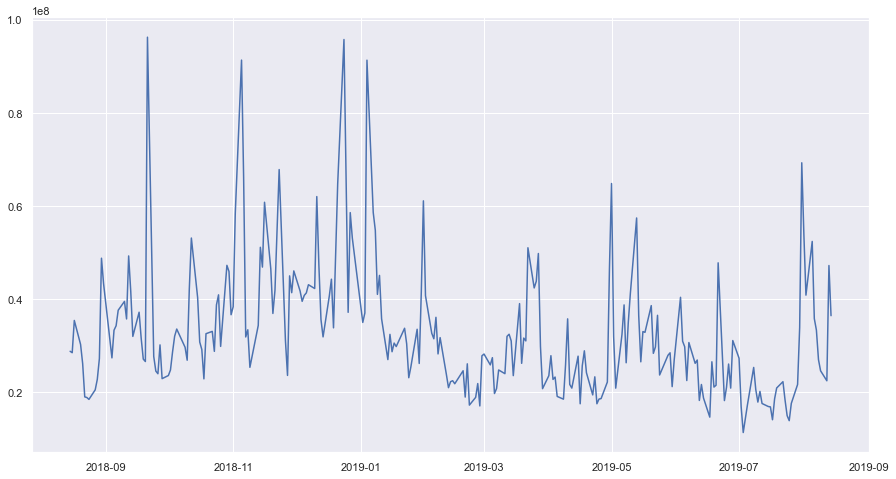

In [61]:
rcParams['figure.figsize'] =15,8
plt.plot(df_date['Time_stamp'], df_date['Volume']);
plt.grid

In [62]:
df_date.describe()

Volume
count  2.510000e+02
mean   3.289967e+07
std    1.385336e+07
min    1.136200e+07
25%    2.329740e+07
50%    2.985580e+07
75%    3.927970e+07
max    9.624670e+07

In [63]:
df_final = pd.read_csv('datasets_302666_618181_AAPL.csv', parse_dates = True, squeeze = True, index_col = 0)

## Parse date = data will be considered as time series data
## Squeeze = index xolumn is is in sequential form and ascending order 
### index = index wil be only date as per date not numbers 0 is column index of date



In [64]:
df_final.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-08-15  209.220001  210.740005  208.330002  210.240005  207.027420   
2018-08-16  211.750000  213.809998  211.470001  213.320007  210.060333   
2018-08-17  213.440002  217.949997  213.160004  217.580002  214.255234   
2018-08-20  218.100006  219.179993  215.110001  215.460007  212.167633   
2018-08-21  216.800003  217.190002  214.029999  215.039993  211.754028   

              Volume  
Date                  
2018-08-15  28807600  
2018-08-16  28500400  
2018-08-17  35427000  
2018-08-20  30287700  
2018-08-21  26159800

In [22]:
df_final.describe()

Open        High         Low       Close   Adj Close  \
count  251.000000  251.000000  251.000000  251.000000  251.000000   
mean   192.856972  194.944861  190.895657  192.941913  191.111984   
std     21.787330   21.956082   21.707333   21.777356   21.369348   
min    143.979996  145.720001  142.000000  142.190002  140.505798   
25%    174.805000  175.934998  173.555000  174.794998  173.366134   
50%    196.419998  198.850006  193.820007  197.000000  195.501465   
75%    209.055000  210.690002  207.154998  208.904999  207.760621   
max    230.779999  233.470001  229.779999  232.070007  228.523819   

             Volume  
count  2.510000e+02  
mean   3.289967e+07  
std    1.385336e+07  
min    1.136200e+07  
25%    2.329740e+07  
50%    2.985580e+07  
75%    3.927970e+07  
max    9.624670e+07

In [23]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-08-15 to 2019-08-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

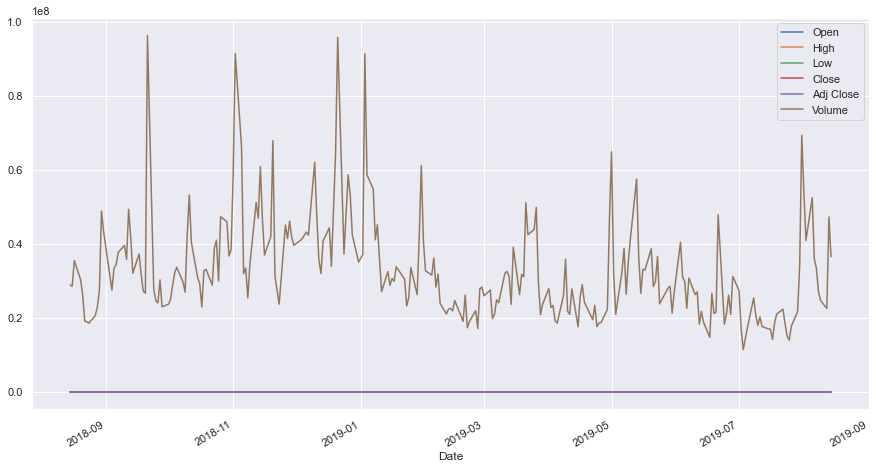

In [24]:
rcParams['figure.figsize'] =15,8
df_final.plot();
plt.grid

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

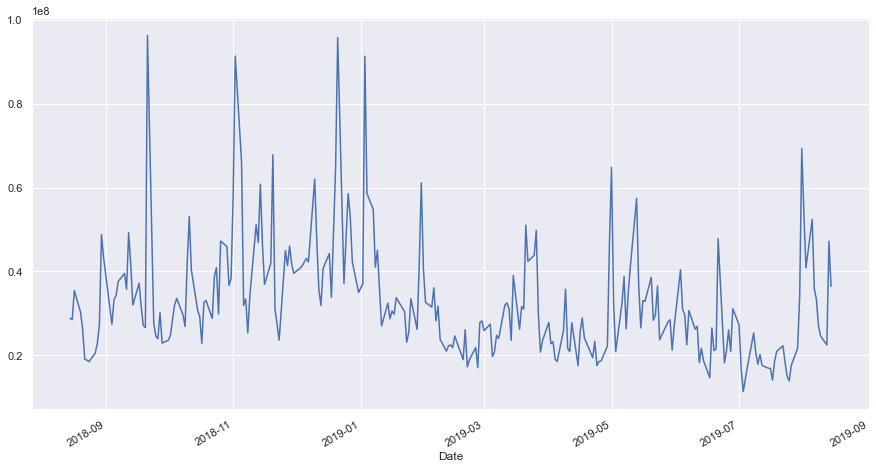

In [25]:
rcParams['figure.figsize'] =15,8
df_final['Volume'].plot();
plt.grid

In [26]:
## Arima = automated regresive integrated moving average - for trend

## sarima - Seasonal automated regresive integrated moving average 
## Sarimax - Seasonal automated regresive integrated moving average external factor



##Trend is a drastic up and down in data

## seasonality is pattern according to seasons

In [27]:
# decomposition - shows chart for trend, seasonality and cycle and etc

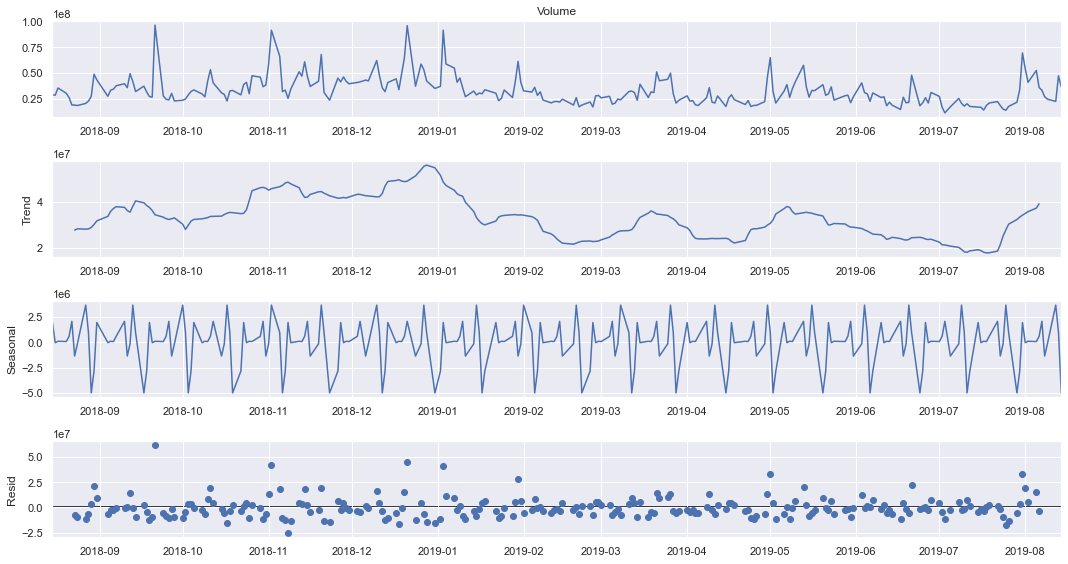

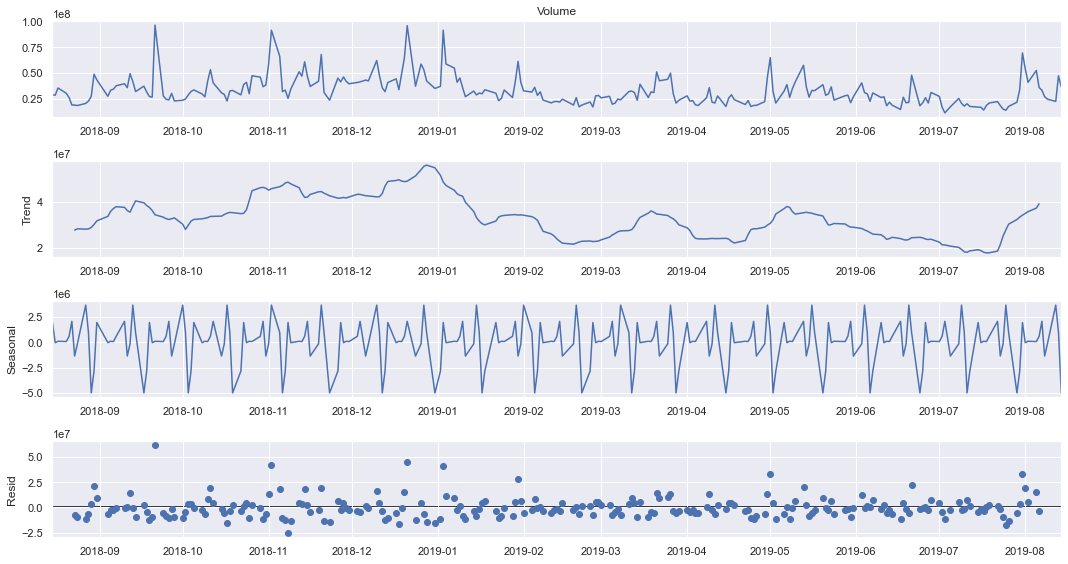

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df_final['Volume'], period= 12)
decomposition.plot()

In [29]:
import statsmodels.api as sm
sm.stats.durbin_watson(df_final['Volume'])

0.13804147049471416

In [30]:
## if the value is less then its a typical time series forecasting proble if it is more than 1 then its a regresssion problem
## durbin watson test is used to 

In [31]:
## Plot the box lplot of 'Open' variable wrt diff years/months

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

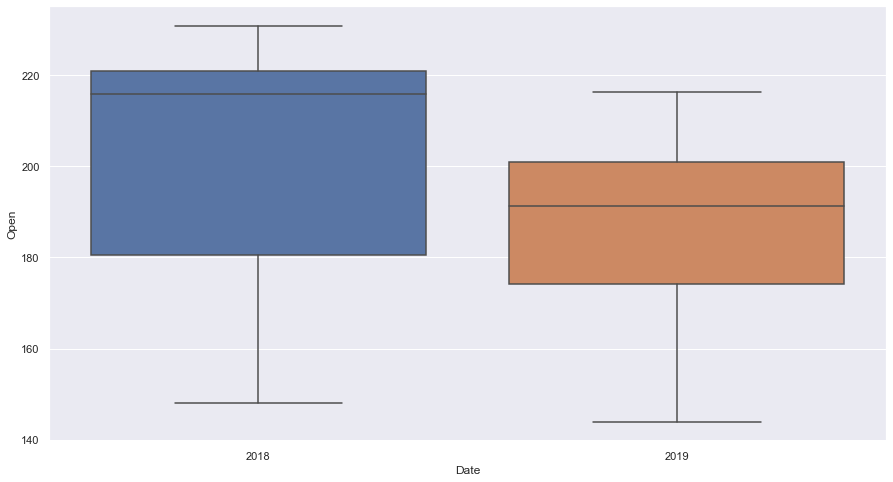

In [32]:
sns.boxplot(x = df_final.index.year, y= df_final['Open'])

plt.grid

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

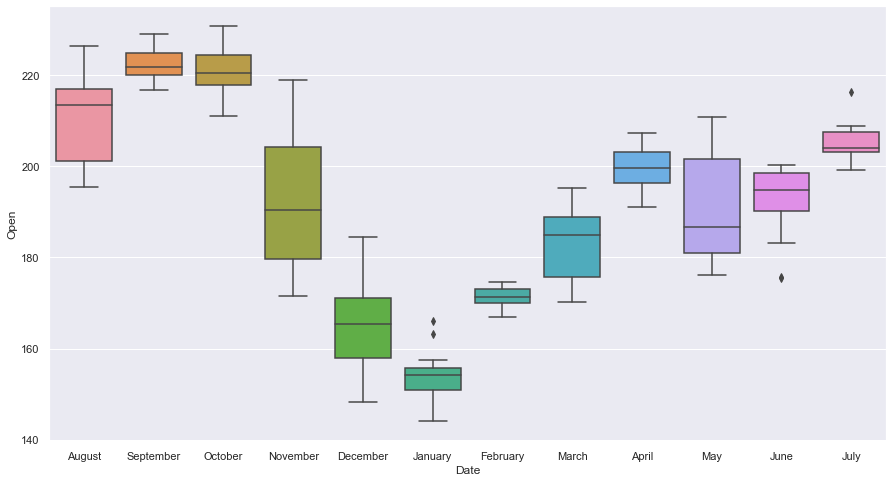

In [66]:
sns.boxplot(x = df_final.index.month_name(), y = df_final['Open'])
plt.grid

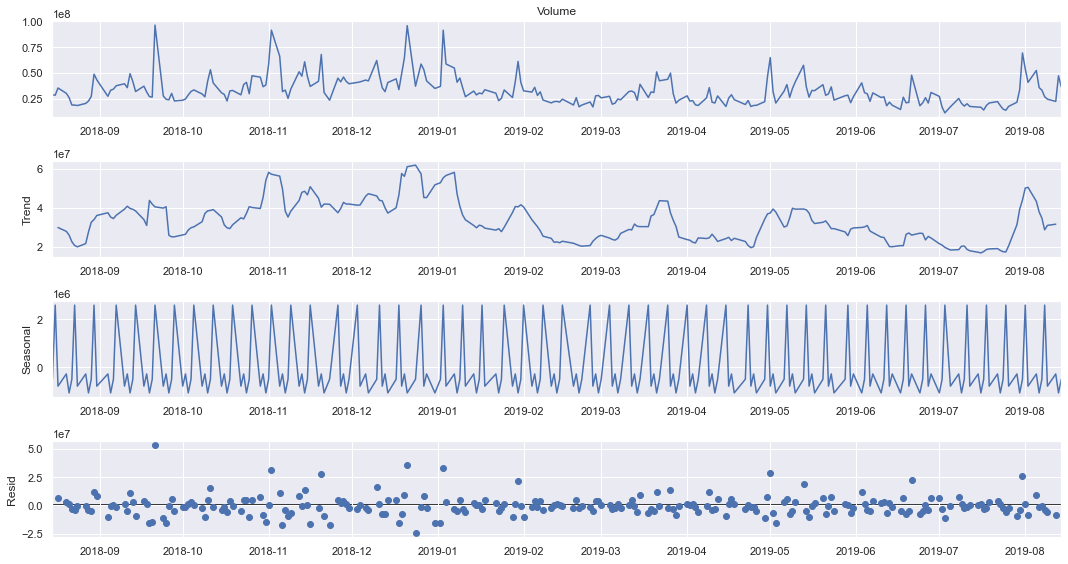

In [34]:
decomposition = seasonal_decompose(df_final['Volume'], period= 5, model = 'additive')
decomposition.plot()
plt.show()

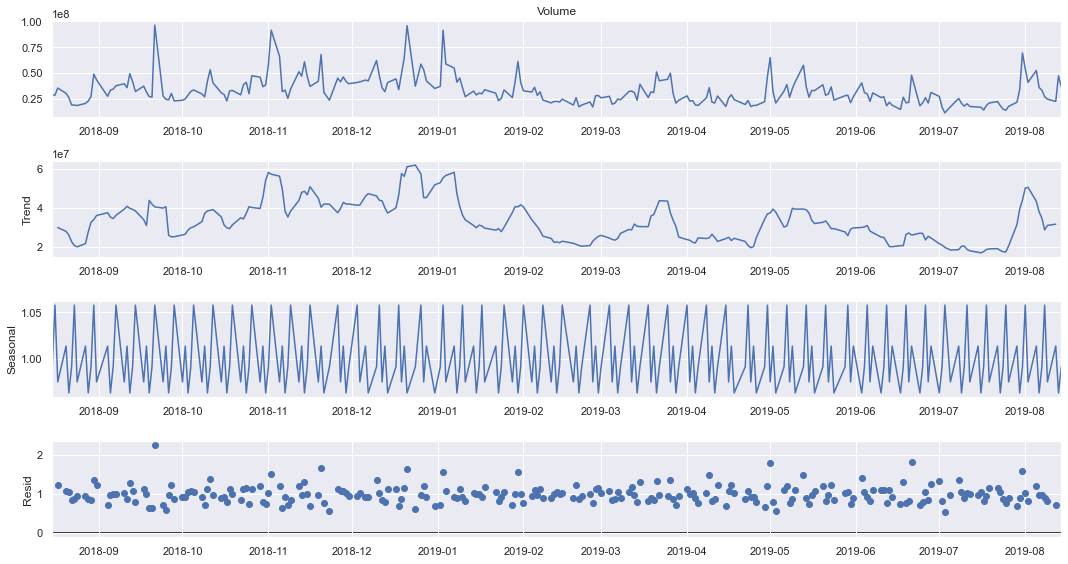

In [35]:
decomposition = seasonal_decompose(df_final['Volume'], period= 5, model = 'multiplicative')
decomposition.plot()
plt.show()

In [36]:
# So series is additive 

In [37]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend, \n ,', trend.head(12),'\n')
print('seasosnality, \n ', seasonality.head(12),'\n')
print('residue, \n , ',residual.head(12),'\n')

Trend, 
 , Date
2018-08-15           NaN
2018-08-16           NaN
2018-08-17    29836500.0
2018-08-20    27878600.0
2018-08-21    25955160.0
2018-08-22    22565040.0
2018-08-23    20612520.0
2018-08-24    19935920.0
2018-08-27    21583260.0
2018-08-28    27565380.0
2018-08-29    32538120.0
2018-08-30    33911120.0
Name: trend, dtype: float64 

seasosnality, 
  Date
2018-08-15    0.991134
2018-08-16    1.057854
2018-08-17    0.974697
2018-08-20    1.013504
2018-08-21    0.962811
2018-08-22    0.991134
2018-08-23    1.057854
2018-08-24    0.974697
2018-08-27    1.013504
2018-08-28    0.962811
2018-08-29    0.991134
2018-08-30    1.057854
Name: seasonal, dtype: float64 

residue, 
 ,  Date
2018-08-15         NaN
2018-08-16         NaN
2018-08-17    1.218195
2018-08-20    1.071939
2018-08-21    1.046814
2018-08-22    0.850352
2018-08-23    0.866002
2018-08-24    0.950848
2018-08-27    0.938302
2018-08-28    0.858198
2018-08-29    0.845120
2018-08-30    1.360181
Name: resid, dtype: float64 

In [70]:
## Now startin with forecasting



df['TimeStamp'] = pd.to_datetime(df['Date'])  

df_final_model = df.set_index(df['TimeStamp'])

In [81]:

df_final_model = df_final_model.drop(['TimeStamp'], axis = 1)

In [75]:
df_final_model['Month'] = df_final_model.index.month
df_final_model['Year'] = df_final_model.index.year

## Taking month and year from date index

In [82]:
df_final_model

Date        Open        High         Low       Close  \
TimeStamp                                                               
2018-08-15  8/15/2018  209.220001  210.740005  208.330002  210.240005   
2018-08-16  8/16/2018  211.750000  213.809998  211.470001  213.320007   
2018-08-17  8/17/2018  213.440002  217.949997  213.160004  217.580002   
2018-08-20  8/20/2018  218.100006  219.179993  215.110001  215.460007   
2018-08-21  8/21/2018  216.800003  217.190002  214.029999  215.039993   
...               ...         ...         ...         ...         ...   
2019-08-08   8/8/2019  200.199997  203.529999  199.389999  203.429993   
2019-08-09   8/9/2019  201.300003  202.759995  199.289993  200.990005   
2019-08-12  8/12/2019  199.619995  202.050003  199.149994  200.479996   
2019-08-13  8/13/2019  201.020004  212.139999  200.479996  208.970001   
2019-08-14  8/14/2019  203.160004  206.440002  202.589996  202.750000   

             Adj Close    Volume  Month  Year  
TimeStamp                                      
2018-08-15  207.027420  28807600      8  2018  
2018-08-16  210.060333  28500400      8  2018  
2018-08-17  214.255234  35427000      8  2018  
2018-08-20  212.167633  30287700      8  2018  
2018-08-21  211.754028  26159800      8  2018  
...                ...       ...    ...   ...  
2019-08-08  202.659988  27009500      8  2019  
2019-08-09  200.990005  24619700      8  2019  
2019-08-12  200.479996  22474900      8  2019  
2019-08-13  208.970001  47218500      8  2019  
2019-08-14  202.750000  36453100      8  2019  

[251 rows x 9 columns]

In [83]:
train_data = df_final_model[pd.to_datetime(df_final_model['Date'])< pd.to_datetime('2019-06-14')]
train_data.shape

## taking 10 months data for training data out of 12 months data

(208, 9)

In [84]:
train_data

Date        Open        High         Low       Close  \
TimeStamp                                                               
2018-08-15  8/15/2018  209.220001  210.740005  208.330002  210.240005   
2018-08-16  8/16/2018  211.750000  213.809998  211.470001  213.320007   
2018-08-17  8/17/2018  213.440002  217.949997  213.160004  217.580002   
2018-08-20  8/20/2018  218.100006  219.179993  215.110001  215.460007   
2018-08-21  8/21/2018  216.800003  217.190002  214.029999  215.039993   
...               ...         ...         ...         ...         ...   
2019-06-07   6/7/2019  186.509995  191.919998  185.770004  190.149994   
2019-06-10  6/10/2019  191.809998  195.369995  191.619995  192.580002   
2019-06-11  6/11/2019  194.860001  196.000000  193.600006  194.809998   
2019-06-12  6/12/2019  193.949997  195.970001  193.389999  194.190002   
2019-06-13  6/13/2019  194.699997  196.789993  193.600006  194.149994   

             Adj Close    Volume  Month  Year  
TimeStamp                                      
2018-08-15  207.027420  28807600      8  2018  
2018-08-16  210.060333  28500400      8  2018  
2018-08-17  214.255234  35427000      8  2018  
2018-08-20  212.167633  30287700      8  2018  
2018-08-21  211.754028  26159800      8  2018  
...                ...       ...    ...   ...  
2019-06-07  189.430267  30684400      6  2019  
2019-06-10  191.851074  26220900      6  2019  
2019-06-11  194.072632  26932900      6  2019  
2019-06-12  193.454987  18253200      6  2019  
2019-06-13  193.415115  21674600      6  2019  

[208 rows x 9 columns]

In [87]:
test_data = df_final_model[pd.to_datetime(df_final_model['Date'])>= pd.to_datetime('2019-06-14')]

test_data.shape

(43, 9)

In [ ]:
## to conduct time series the data should be stationary in nature for that 
# Test for stationarity of the series - Augmented Dickey Fuller Test

## it is necessary bcos most of the model assume that the data is stationary i.e variance covariance autocorrelation etc factors are constant over time

In [88]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() ## 7 days window
    rolstd = timeseries.rolling(window=7).std()
    
    # plot rolling statistics:
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='rolling mean')
    std = plt.plot(rolstd, color='black', label='rolling std')
    plt.legend(loc='best')
    plt.title("Rolling mean & Standard Deviation")
    plt.show(block=False)
    
    # Perform Dickey Fuller Test:
    print("Results of Dickey - Fuller Test :")
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags used',
                                            'No of Observation used'])
    for key, value in dftest[4].items():
        dfoutput['Critical value (%s)'%key] = value
    print(dfoutput, '\n')

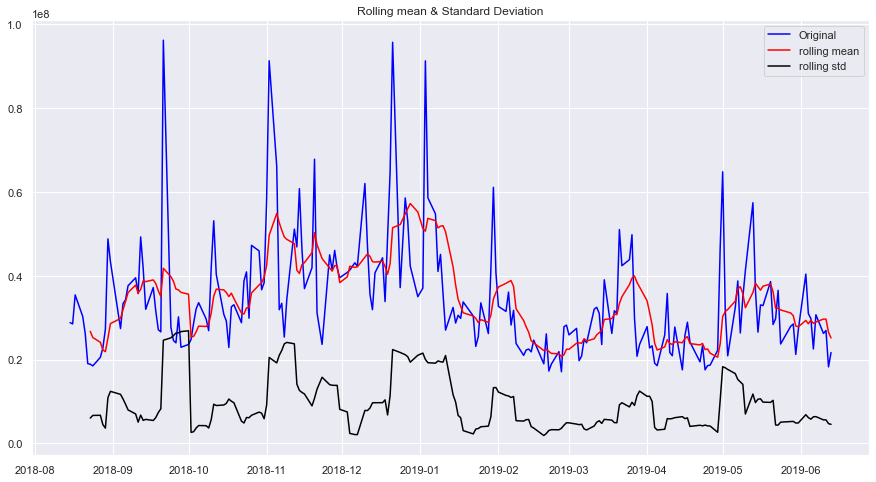

Results of Dickey - Fuller Test :
Test Statistic             -2.864792
p-value                     0.049598
#Lags used                  6.000000
No of Observation used    201.000000
Critical value (1%)        -3.463309
Critical value (5%)        -2.876029
Critical value (10%)       -2.574493
dtype: float64 



In [108]:
test_stationarity(train_data['Volume'])

In [91]:
## p-value is less than 0.5 hence stationary

## as we can see the red and black line are very much similar we can assume that the data is stationary

In [92]:
## for every arima sarima sarimax model pdq value is necessary for parameter selection



In [ ]:
## Using automation to find all combnatione 

In [129]:
import itertools
p = q = range(0, 3) ## P, Q value can be max 5 , ## This is lag that can be max 2
d = range(0,1)  ## d we already seen that data is stationary so it will be 0 ## It will be 2 if p value is 2
pdq = list(itertools.product(p, d, q))

model_pdq = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, d, q))] ## 5 is freq
print("Examples of parameter combinations for Model....")
print('Model : {}{}'.format(pdq[1], model_pdq[1]))
print('Model : {}{}'.format(pdq[1], model_pdq[2]))
print('Model : {}{}'.format(pdq[2], model_pdq[3]))
print('Model : {}{}'.format(pdq[2], model_pdq[4]))
print('Model : {}{}'.format(pdq[1], model_pdq[5]))

model_pdq

Examples of parameter combinations for Model....
Model : (0, 0, 1)(0, 0, 1, 5)
Model : (0, 0, 1)(0, 0, 2, 5)
Model : (0, 0, 2)(1, 0, 0, 5)
Model : (0, 0, 2)(1, 0, 1, 5)
Model : (0, 0, 1)(1, 0, 2, 5)


[(0, 0, 0, 5),
 (0, 0, 1, 5),
 (0, 0, 2, 5),
 (1, 0, 0, 5),
 (1, 0, 1, 5),
 (1, 0, 2, 5),
 (2, 0, 0, 5),
 (2, 0, 1, 5),
 (2, 0, 2, 5)]

In [138]:
dfObj = pd.DataFrame(columns=['param', 'seasonal_ex', 'AIC'])
dfObj

Empty DataFrame
Columns: [param, seasonal_ex, AIC]
Index: []

In [98]:
## Building Sarima X model

In [158]:
train_final = train_data[['Volume']]
train_final

Volume
TimeStamp           
2018-08-15  28807600
2018-08-16  28500400
2018-08-17  35427000
2018-08-20  30287700
2018-08-21  26159800
...              ...
2019-06-07  30684400
2019-06-10  26220900
2019-06-11  26932900
2019-06-12  18253200
2019-06-13  21674600

[208 rows x 1 columns]

In [160]:
test_final = test_data[['Volume']]
test_final

Volume
TimeStamp           
2019-06-14  18761500
2019-06-17  14669100
2019-06-18  26551000
2019-06-19  21124200
2019-06-20  21514000
2019-06-21  47800600
2019-06-24  18220400
2019-06-25  21070300
2019-06-26  26067500
2019-06-27  20899700
2019-06-28  31110600
2019-07-01  27316700
2019-07-02  16935200
2019-07-03  11362000
2019-07-05  17265500
2019-07-08  25338600
2019-07-09  20578000
2019-07-10  17897100
2019-07-11  20191800
2019-07-12  17595200
2019-07-15  16947400
2019-07-16  16866800
2019-07-17  14107500
2019-07-18  18582200
2019-07-19  20929300
2019-07-22  22277900
2019-07-23  18355200
2019-07-24  14991600
2019-07-25  13909600
2019-07-26  17618900
2019-07-29  21673400
2019-07-30  33935700
2019-07-31  69281400
2019-08-01  54017900
2019-08-02  40862100
2019-08-05  52393000
2019-08-06  35824800
2019-08-07  33364400
2019-08-08  27009500
2019-08-09  24619700
2019-08-12  22474900
2019-08-13  47218500
2019-08-14  36453100

In [140]:
x_train = train_data[['High','Low','Close']]
x_test = test_data[['High','Low','Close']]

## Using these x factors for predicting volume

In [141]:
import statsmodels.api as sm

In [142]:
for param in pdq:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(train_data['Volume'], exog= x_train,
                                        order=param,
                                       seasonal_order=param_seasonal, 
                                      enforce_stationarity=False, enforce_invertibility=False)
        
        ## Pasing x factor and param to the sarimax model
        results_SARIMA = mod.fit()
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        dfObj = dfObj.append({'param': param, 'seasonal_ex':param_seasonal, 
                               'AIC':results_SARIMA.aic}, ignore_index=True)

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A

SARIMA(0, 0, 0)x(0, 0, 0, 5)7 - AIC:8220.011321406058
SARIMA(0, 0, 0)x(0, 0, 1, 5)7 - AIC:7145.971922424636
SARIMA(0, 0, 0)x(0, 0, 2, 5)7 - AIC:6972.698927939726
SARIMA(0, 0, 0)x(1, 0, 0, 5)7 - AIC:7179.320223443863
SARIMA(0, 0, 0)x(1, 0, 1, 5)7 - AIC:7138.396752137973


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A

SARIMA(0, 0, 0)x(1, 0, 2, 5)7 - AIC:6967.167147317206
SARIMA(0, 0, 0)x(2, 0, 0, 5)7 - AIC:7004.453417227186


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 0)x(2, 0, 1, 5)7 - AIC:7001.454244459479


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 0)x(2, 0, 2, 5)7 - AIC:6961.1195728947005
SARIMA(0, 0, 1)x(0, 0, 0, 5)7 - AIC:7265.749724717331
SARIMA(0, 0, 1)x(0, 0, 1, 5)7 - AIC:7092.300148795268


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A

SARIMA(0, 0, 1)x(0, 0, 2, 5)7 - AIC:6921.031642835972
SARIMA(0, 0, 1)x(1, 0, 0, 5)7 - AIC:7161.294518926603


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 1)x(1, 0, 1, 5)7 - AIC:7089.526580697384


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 1)x(1, 0, 2, 5)7 - AIC:6918.744072801764
SARIMA(0, 0, 1)x(2, 0, 0, 5)7 - AIC:6989.521255209393


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 1)x(2, 0, 1, 5)7 - AIC:6988.195987664658


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 1)x(2, 0, 2, 5)7 - AIC:6919.985692035167
SARIMA(0, 0, 2)x(0, 0, 0, 5)7 - AIC:7227.534091234352
SARIMA(0, 0, 2)x(0, 0, 1, 5)7 - AIC:7056.056574516413


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A

SARIMA(0, 0, 2)x(0, 0, 2, 5)7 - AIC:6883.84525036874
SARIMA(0, 0, 2)x(1, 0, 0, 5)7 - AIC:7159.489800043095


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)x(1, 0, 1, 5)7 - AIC:7054.217740626459


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)x(1, 0, 2, 5)7 - AIC:6881.817437033671
SARIMA(0, 0, 2)x(2, 0, 0, 5)7 - AIC:6988.202761300426


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)x(2, 0, 1, 5)7 - AIC:6986.954205044383


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)x(2, 0, 2, 5)7 - AIC:6884.321646519034
SARIMA(1, 0, 0)x(0, 0, 0, 5)7 - AIC:7291.514581042833
SARIMA(1, 0, 0)x(0, 0, 1, 5)7 - AIC:7120.798701053569


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A

SARIMA(1, 0, 0)x(0, 0, 2, 5)7 - AIC:6950.590843607326
SARIMA(1, 0, 0)x(1, 0, 0, 5)7 - AIC:7120.692052795312


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)x(1, 0, 1, 5)7 - AIC:7119.28352956482


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)x(1, 0, 2, 5)7 - AIC:6948.821501475273
SARIMA(1, 0, 0)x(2, 0, 0, 5)7 - AIC:6950.300755672297


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)x(2, 0, 1, 5)7 - AIC:6948.90142198957


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)x(2, 0, 2, 5)7 - AIC:6950.451629183033
SARIMA(1, 0, 1)x(0, 0, 0, 5)7 - AIC:7248.303589323557


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(0, 0, 1, 5)7 - AIC:7076.076063823324


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(0, 0, 2, 5)7 - AIC:6906.233945128073


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(1, 0, 0, 5)7 - AIC:7110.721247509183


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(1, 0, 1, 5)7 - AIC:7078.032488290635


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(1, 0, 2, 5)7 - AIC:6906.608939393114


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(2, 0, 0, 5)7 - AIC:6940.660043746679


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(2, 0, 1, 5)7 - AIC:6941.5918603020245


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(2, 0, 2, 5)7 - AIC:6898.719855052837
SARIMA(1, 0, 2)x(0, 0, 0, 5)7 - AIC:7213.075638954887


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(0, 0, 1, 5)7 - AIC:7041.860456069794


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(0, 0, 2, 5)7 - AIC:6870.131803681008


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(1, 0, 0, 5)7 - AIC:7110.68301950864


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(1, 0, 1, 5)7 - AIC:7043.813423421116


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(1, 0, 2, 5)7 - AIC:6871.2418344260805


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(2, 0, 0, 5)7 - AIC:6940.647262543514


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(2, 0, 1, 5)7 - AIC:6942.053120396593


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(2, 0, 2, 5)7 - AIC:6870.763073542545
SARIMA(2, 0, 0)x(0, 0, 0, 5)7 - AIC:7255.077410382863
SARIMA(2, 0, 0)x(0, 0, 1, 5)7 - AIC:7119.519834914685


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A

SARIMA(2, 0, 0)x(0, 0, 2, 5)7 - AIC:6949.775601784646
SARIMA(2, 0, 0)x(1, 0, 0, 5)7 - AIC:7085.09551632426


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)x(1, 0, 1, 5)7 - AIC:7084.573179820574


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)x(1, 0, 2, 5)7 - AIC:6948.135965675819
SARIMA(2, 0, 0)x(2, 0, 0, 5)7 - AIC:6915.155549960451


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)x(2, 0, 1, 5)7 - AIC:6913.852823304345


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)x(2, 0, 2, 5)7 - AIC:6908.633332868887
SARIMA(2, 0, 1)x(0, 0, 0, 5)7 - AIC:7247.469043392662


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(0, 0, 1, 5)7 - AIC:7076.096333295009


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(0, 0, 2, 5)7 - AIC:6906.1338886613685


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(1, 0, 0, 5)7 - AIC:7076.131979294507


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(1, 0, 1, 5)7 - AIC:7078.068965116261


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(1, 0, 2, 5)7 - AIC:6907.169142348837


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(2, 0, 0, 5)7 - AIC:6906.035582623233


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(2, 0, 1, 5)7 - AIC:6908.473573161944


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated f

SARIMA(2, 0, 1)x(2, 0, 2, 5)7 - AIC:6899.163414876622
SARIMA(2, 0, 2)x(0, 0, 0, 5)7 - AIC:7215.071404890182


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(0, 0, 1, 5)7 - AIC:7043.851523865551


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(0, 0, 2, 5)7 - AIC:6872.130067282182


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(1, 0, 0, 5)7 - AIC:7078.129023641162


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(1, 0, 1, 5)7 - AIC:7045.8072064162625


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(1, 0, 2, 5)7 - AIC:6873.235000473103


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(2, 0, 0, 5)7 - AIC:6907.991753238513


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(2, 0, 1, 5)7 - AIC:6910.431158276078


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(2, 0, 2, 5)7 - AIC:6873.574608420566


C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [143]:
dfObj.sort_values(by=['AIC'])

param   seasonal_ex          AIC
47  (1, 0, 2)  (0, 0, 2, 5)  6870.131804
53  (1, 0, 2)  (2, 0, 2, 5)  6870.763074
50  (1, 0, 2)  (1, 0, 2, 5)  6871.241834
74  (2, 0, 2)  (0, 0, 2, 5)  6872.130067
77  (2, 0, 2)  (1, 0, 2, 5)     6873.235
..        ...           ...          ...
36  (1, 0, 1)  (0, 0, 0, 5)  7248.303589
54  (2, 0, 0)  (0, 0, 0, 5)   7255.07741
9   (0, 0, 1)  (0, 0, 0, 5)  7265.749725
27  (1, 0, 0)  (0, 0, 0, 5)  7291.514581
0   (0, 0, 0)  (0, 0, 0, 5)  8220.011321

[81 rows x 3 columns]

In [ ]:
### Passing the lowest AIC seasonal value to the model to summurize the model


In [144]:
mod = sm.tsa.statespace.SARIMAX(train_data['Volume'], exog=x_train,
                                        order=(1,0,2),
                                       seasonal_order=(0,0,2,5), 
                                      enforce_stationarity=False, enforce_invertibility=False)
results_SARIMA = mod.fit()
print(results_SARIMA.summary())

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                                     SARIMAX Results                                     
Dep. Variable:                            Volume   No. Observations:                  208
Model:             SARIMAX(1, 0, 2)x(0, 0, 2, 5)   Log Likelihood               -3426.066
Date:                           Sun, 03 Sep 2023   AIC                           6870.132
Time:                                   21:01:32   BIC                           6899.589
Sample:                                        0   HQIC                          6882.059
                                           - 208                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
High        5.293e+06   3.31e+05     15.973      0.000    4.64e+06    5.94e+06
Low        -4.374e+06   4.45e+04    -98.239

In [ ]:
### Opening values p value is high and causing prob so delting the open value and trying again

In [165]:
len(test_final)

43

In [169]:
final_hat_avg = test_final.copy()
pred_SARIMAX = results_SARIMA.get_forecast(steps= len(test_final), exog = x_test)## Can edit steps to predict more further in time than in test
pred_SARIMAX.predicted_mean

C:\Users\prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



208    2.486448e+07
209    2.367292e+07
210    3.423530e+07
211    2.403267e+07
212    2.366310e+07
213    2.503351e+07
214    2.145123e+07
215    3.171060e+07
216    2.867762e+07
217    2.221053e+07
218    2.380369e+07
219    3.147878e+07
220    2.027180e+07
221    2.005705e+07
222    2.276685e+07
223    2.657968e+07
224    2.446091e+07
225    2.257547e+07
226    2.674157e+07
227    2.129424e+07
228    2.177053e+07
229    2.589627e+07
230    2.254233e+07
231    2.294845e+07
232    3.475066e+07
233    2.928290e+07
234    2.076160e+07
235    2.275362e+07
236    2.660294e+07
237    2.684215e+07
238    2.437636e+07
239    2.758601e+07
240    6.589958e+07
241    7.211363e+07
242    3.684543e+07
243    4.433701e+07
244    3.181886e+07
245    3.897498e+07
246    3.194015e+07
247    3.040176e+07
248    2.772008e+07
249    6.814510e+07
250    3.404555e+07
Name: predicted_mean, dtype: float64

In [170]:
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error


rmse = sqrt(mean_squared_error(test_data.Volume, pred_SARIMAX.predicted_mean, squared=False))
mape = mean_absolute_percentage_error(test_data.Volume, pred_SARIMAX.predicted_mean)
print(rmse)
print(mape*100)## error percentage

## to calculate the erroe

2869.4471128963696
29.278127399285324


In [171]:
resultDf2 = pd.DataFrame({'Test RMSE' : rmse}, index = ['(1, 0, 2)	NaN	6872.112334	(0, 0, 2, 5)'])
resultDf2

Test RMSE
(1, 0, 2)\tNaN\t6872.112334\t(0, 0, 2, 5)  2869.447113

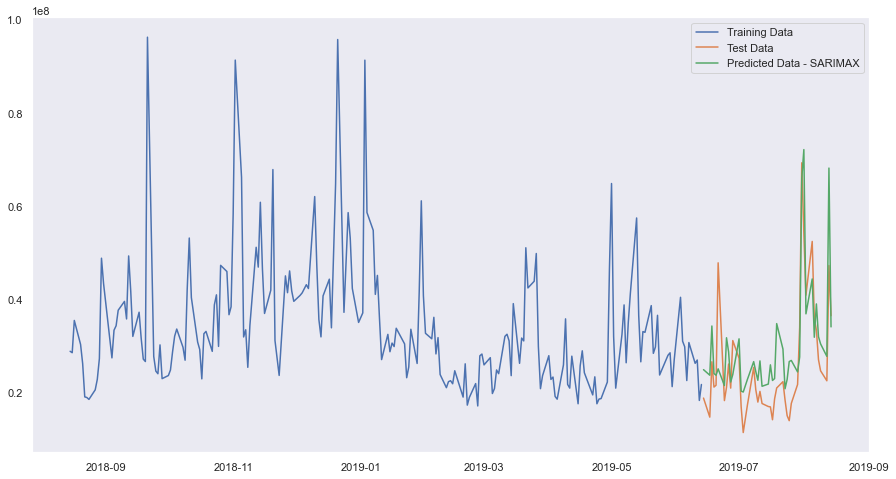

In [172]:
plt.plot(train_final, label='Training Data')
plt.plot(test_final, label='Test Data')

plt.plot(test_final.index, pred_SARIMAX.predicted_mean, label='Predicted Data - SARIMAX')
plt.legend(loc='best')
plt.grid();

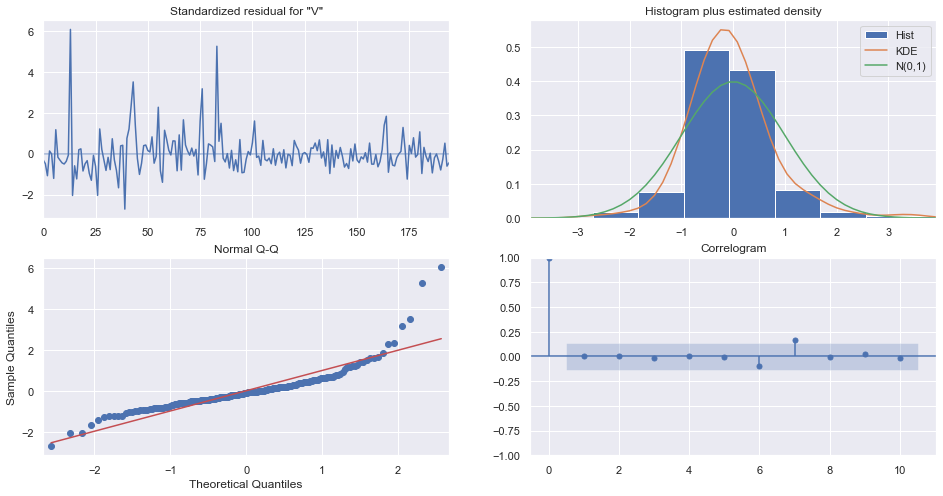

In [156]:
results_SARIMA.plot_diagnostics(figsize=(16,8))
plt.show()